In [2]:
#Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Company_Data.csv")

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.shape

(400, 11)

In [7]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
df.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [11]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
df['Sales'] = pd.cut(x=df['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [12]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Check Correlation amoung parameters
corr = df.corr()

In [14]:
corr

,CompPrice,Income,Advertising,Population,Price,Age,Education
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


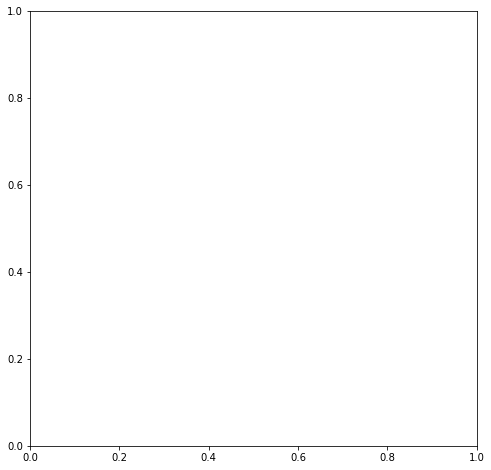

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

([<matplotlib.axis.XTick at 0x26fde496370>,
 [Text(0, 0, 'CompPrice'),
  Text(1, 0, 'Income'),
  Text(2, 0, 'Advertising'),
  Text(3, 0, 'Population'),
  Text(4, 0, 'Price'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'Education')])

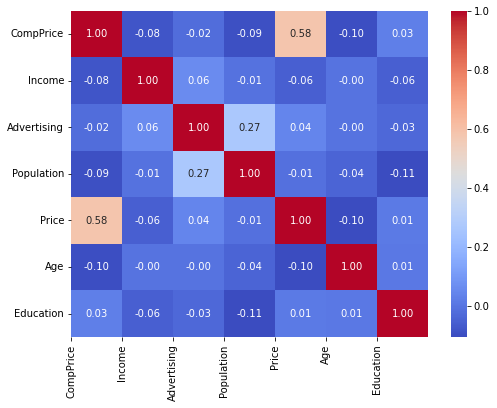

In [17]:
# Generate a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

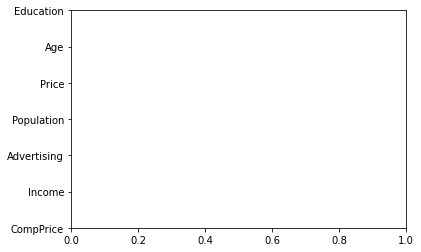

In [20]:
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

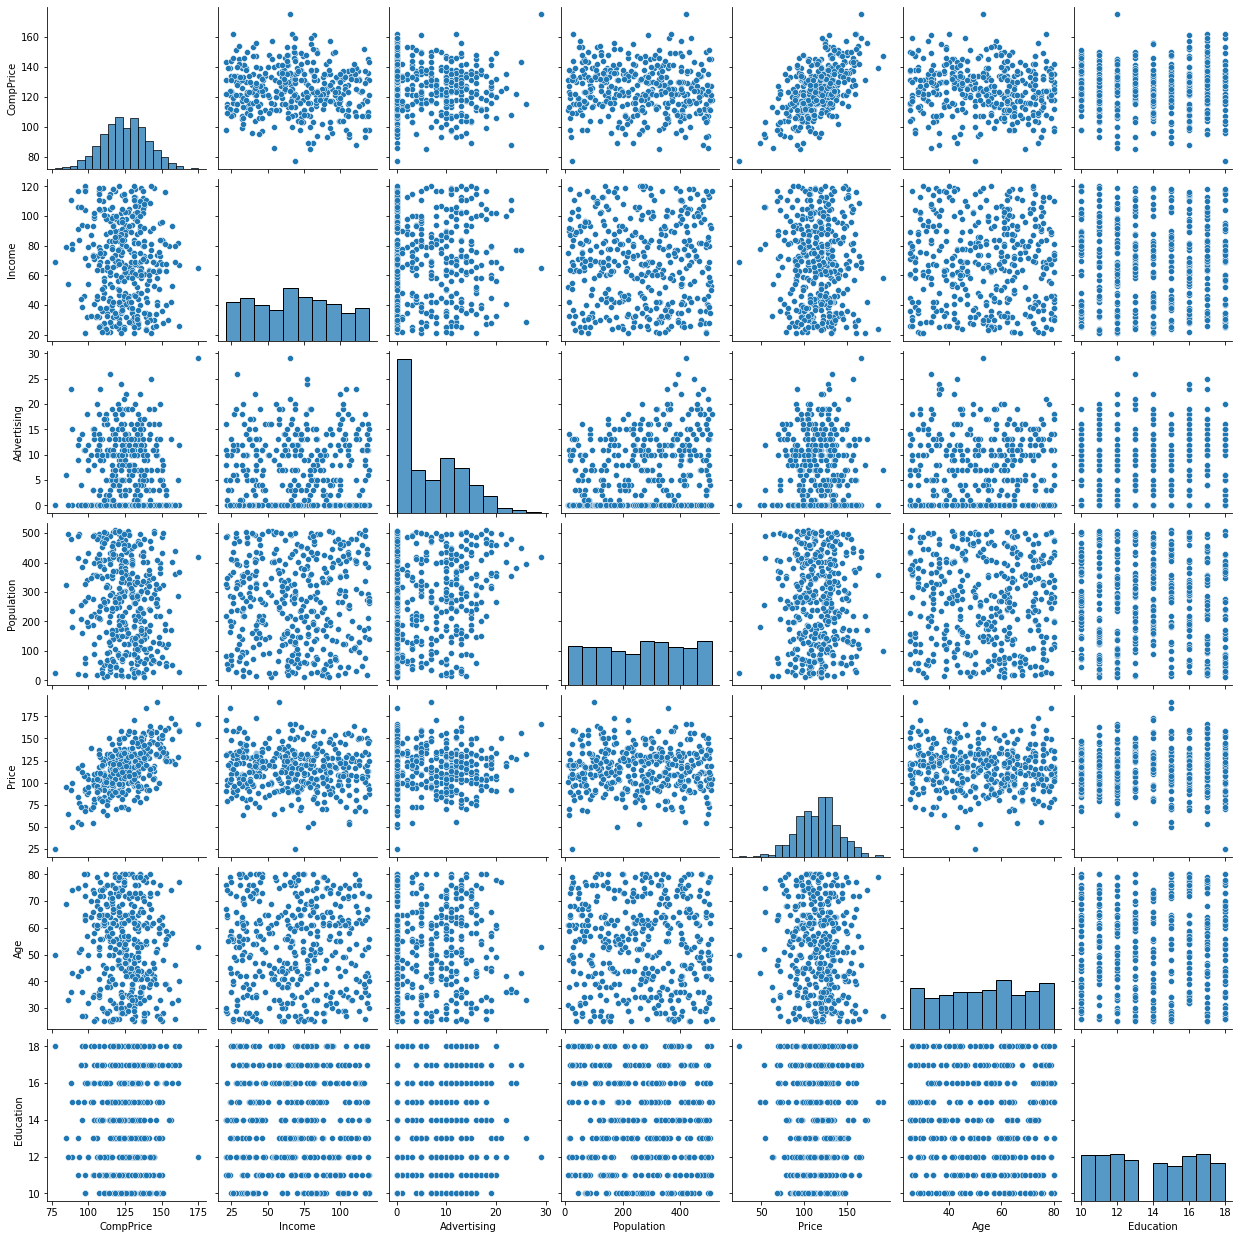

In [22]:
#pairwise plot of all the features
sns.pairplot(df)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


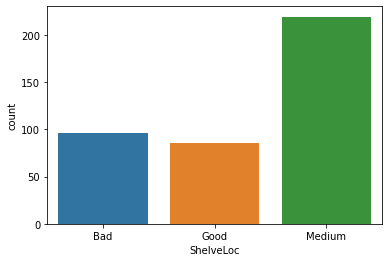

In [23]:
# checking count of categories for categorical columns colums
sns.countplot(df['ShelveLoc'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


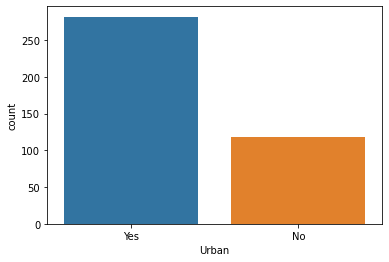

In [24]:
sns.countplot(df['Urban'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


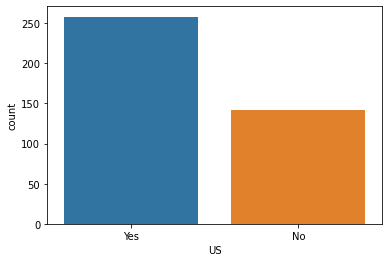

In [25]:
sns.countplot(df['US'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


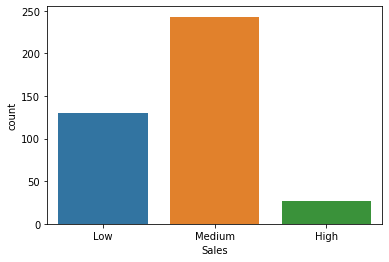

In [26]:
sns.countplot(df['Sales'])
plt.show()

In [27]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

In [28]:
LE =LabelEncoder()

In [29]:
df.iloc[:,6] = LE.fit_transform(df.iloc[:,6])
df.iloc[:,9] = LE.fit_transform(df.iloc[:,9])
df.iloc[:,10] = LE.fit_transform(df.iloc[:,10])
df.iloc[:,0] = LE.fit_transform(df.iloc[:,0])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [30]:
#splitting the data into x and y
x = df.drop('Sales',axis=1)
y = df["Sales"]

In [31]:
#Data Partition
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=(40))

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:",ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:",ac2.round(2))

training score: 0.81
test score: 0.72


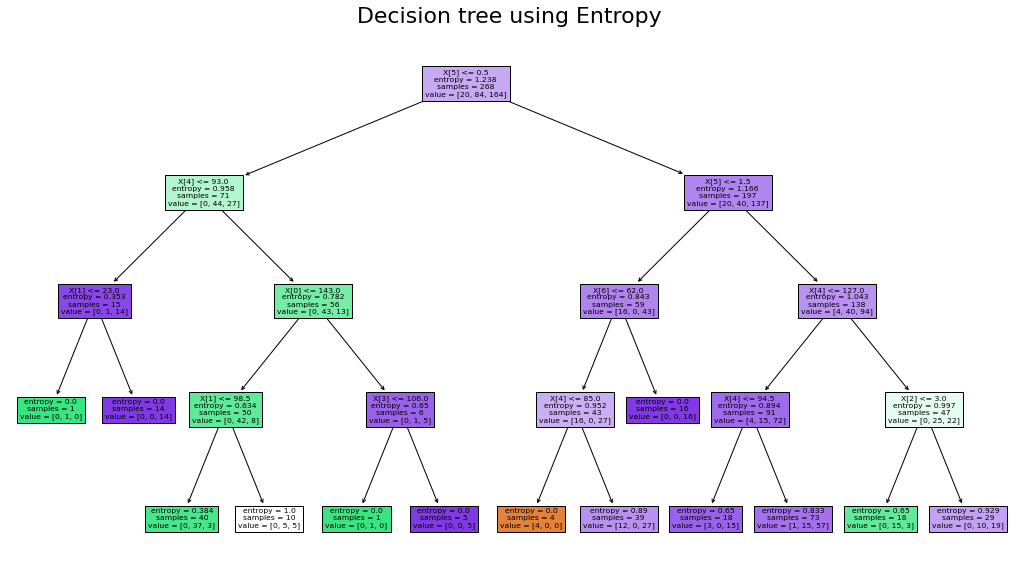

In [35]:
plt.figure(figsize=(18,10)) 
tree.plot_tree(model,filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.show()

In [36]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=4)
model1.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=4)

In [37]:
y_pred_train = model1.predict(x_train)
y_pred_test = model1.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:",ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:",ac2.round(2))

training score: 0.82
test score: 0.68


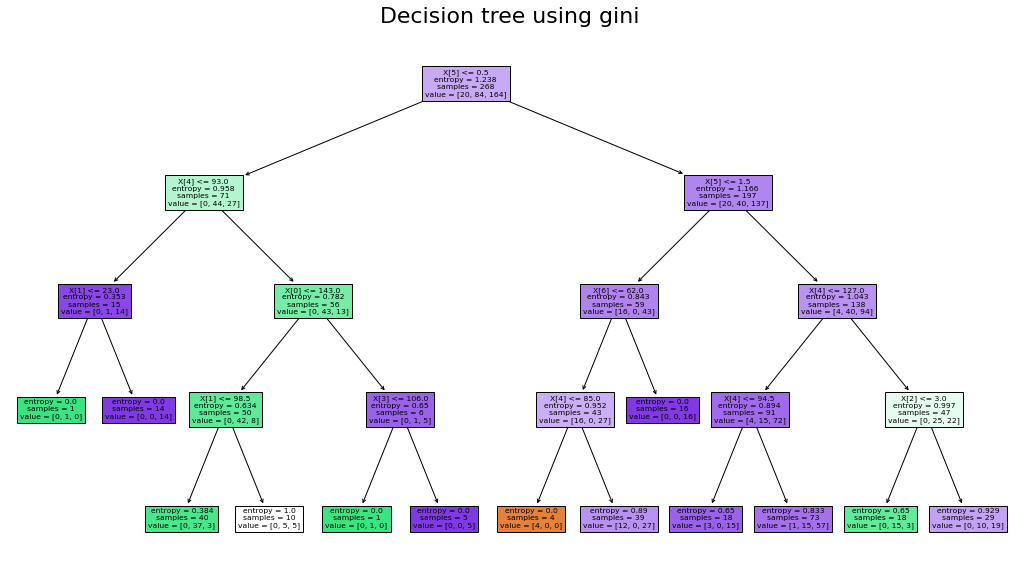

In [39]:
plt.figure(figsize=(18,10)) 
tree.plot_tree(model,filled=True)
plt.title('Decision tree using gini',fontsize=22)
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [41]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('Random Forest Classifier', RandomForestClassifier(max_depth=0.7)))

In [42]:
for title, modelname in models:
    modelname.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
y_pred = modelname.predict(x_test)
predictions = [round(value) for value in y_pred]

In [44]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(title,"Accuracy: %.2f%%" % (accuracy * 100.0))

Random Forest Classifier Accuracy: 59.85%
